In [2]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
from config import (aqs_api_key)
from config import (email_address)
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

nyCO_data = []
nyOzone_data = []
nyPM_data = []
cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_data = []

In [3]:
# Create a DataFrame for New York and pull carbon monoxide data from API
nyCO_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
nyCO_response = requests.get(sample_data_url, params = nyCO_params).json()
nyCO_data.append(nyCO_response)

nyCO_df = pd.DataFrame(nyCO_data[0]["Data"])
print(nyCO_df)

     state_code county_code site_number parameter_code  poc   latitude  \
0            36         001        0012          42101    1  42.680750   
1            36         001        0012          42101    1  42.680750   
2            36         001        0012          42101    1  42.680750   
3            36         001        0012          42101    1  42.680750   
4            36         001        0012          42101    1  42.680750   
...         ...         ...         ...            ...  ...        ...   
7200         36         081        0125          42101    1  40.739264   
7201         36         081        0125          42101    1  40.739264   
7202         36         081        0125          42101    1  40.739264   
7203         36         081        0125          42101    1  40.739264   
7204         36         081        0125          42101    1  40.739264   

      longitude  datum        parameter        sample_duration  ...  \
0    -73.757330  WGS84  Carbon monoxide 

In [4]:
CO8hour_df = nyCO_df.loc[nyCO_df["sample_duration"] == "8-HR RUN AVG END HOUR"]
CO8hour_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
1,36,001,0012,42101,1,42.680750,-73.757330,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
3,36,001,0012,42101,1,42.680750,-73.757330,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
5,36,001,0012,42101,1,42.680750,-73.757330,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
7,36,001,0012,42101,1,42.680750,-73.757330,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
9,36,001,0012,42101,1,42.680750,-73.757330,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,36,081,0125,42101,1,40.739264,-73.817694,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Queens College Near Road,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
7198,36,081,0125,42101,1,40.739264,-73.817694,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Queens College Near Road,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
7200,36,081,0125,42101,1,40.739264,-73.817694,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Queens College Near Road,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
7202,36,081,0125,42101,1,40.739264,-73.817694,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Queens College Near Road,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04


In [5]:
# Create a DataFrame for New York and pull carbon monoxide data from API
nyOzone_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
nyOzone_response = requests.get(sample_data_url, params = nyOzone_params).json()
nyOzone_data.append(nyOzone_response)

nyOzone_df = pd.DataFrame(nyOzone_data[0]["Data"])
print(nyOzone_df)

      state_code county_code site_number parameter_code  poc   latitude  \
0             36         063        1006          44201    1  43.223860   
1             36         063        1006          44201    1  43.223860   
2             36         063        1006          44201    1  43.223860   
3             36         063        1006          44201    1  43.223860   
4             36         063        1006          44201    1  43.223860   
...          ...         ...         ...            ...  ...        ...   
39716         36         103        0044          44201    1  40.961017   
39717         36         103        0044          44201    1  40.961017   
39718         36         103        0044          44201    1  40.961017   
39719         36         103        0044          44201    1  40.961017   
39720         36         103        0044          44201    1  40.961017   

       longitude  datum parameter          sample_duration  ... method_code  \
0     -78.478880  WG

In [6]:
Ozone8hour_df = nyOzone_df.loc[nyOzone_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"]
Ozone8hour_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
1,36,063,1006,44201,1,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
2,36,063,1006,44201,1,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
3,36,063,1006,44201,1,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
5,36,063,1006,44201,1,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
6,36,063,1006,44201,1,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,36,103,0044,44201,1,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Flax Pond,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22
39716,36,103,0044,44201,1,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Flax Pond,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22
39718,36,103,0044,44201,1,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Flax Pond,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22
39719,36,103,0044,44201,1,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Flax Pond,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22


In [7]:
# Create a DataFrame for New York and pull carbon monoxide data from API
nyPM_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
nyPM_response = requests.get(sample_data_url, params = nyPM_params).json()
nyPM_data.append(nyPM_response)

nyPM_df = pd.DataFrame(nyPM_data[0]["Data"])
nyPM_df


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
1,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
2,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
3,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
4,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
16793,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
16794,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
16795,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04


In [8]:
PM24hour_df = nyPM_df.loc[nyPM_df["sample_duration"] == "24-HR BLK AVG"]
PM24hour_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
1,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
3,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
5,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
7,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
9,36,005,0080,88502,3,40.83606,-73.92009,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16788,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
16790,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
16792,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
16794,36,071,0002,88502,3,41.49916,-74.00885,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,NEWBURGH,55 BROADWAY,New York,Orange,Newburgh,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04


In [9]:
mergedny_df = Ozone8hour_df.merge(Ozone8hour_df, how='outer', left_index=True, right_index=True)
print(mergedny_df)

      state_code_x county_code_x site_number_x parameter_code_x  poc_x  \
1               36           063          1006            44201      1   
2               36           063          1006            44201      1   
3               36           063          1006            44201      1   
5               36           063          1006            44201      1   
6               36           063          1006            44201      1   
...            ...           ...           ...              ...    ...   
39715           36           103          0044            44201      1   
39716           36           103          0044            44201      1   
39718           36           103          0044            44201      1   
39719           36           103          0044            44201      1   
39720           36           103          0044            44201      1   

       latitude_x  longitude_x datum_x parameter_x        sample_duration_x  \
1       43.223860   -78.478880  

In [10]:
mergedny_df = mergedny_df.merge(PM24hour_df, how='outer', left_index=True, right_index=True)
mergedny_df.head() 

,state_code_x,county_code_x,site_number_x,parameter_code_x,poc_x,latitude_x,longitude_x,datum_x,parameter_x,sample_duration_x,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
1,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
2,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
5,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
6,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mergedny_df

,state_code_x,county_code_x,site_number_x,parameter_code_x,poc_x,latitude_x,longitude_x,datum_x,parameter_x,sample_duration_x,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
1,36,063,1006,44201,1.0,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
2,36,063,1006,44201,1.0,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,063,1006,44201,1.0,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
5,36,063,1006,44201,1.0,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
6,36,063,1006,44201,1.0,43.223860,-78.478880,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,36,103,0044,44201,1.0,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,36,103,0044,44201,1.0,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39718,36,103,0044,44201,1.0,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39719,36,103,0044,44201,1.0,40.961017,-73.139046,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#copymergedny_df = mergedny_df

In [13]:
NYcountyaqi = mergedny_df.groupby(["county"])["aqi"].mean().reset_index()
NYcountyaqi

,county,aqi
0,Bronx,25.594483
1,Erie,27.643006
2,Essex,12.328402
3,Kings,24.401685
4,Monroe,27.631579
5,Nassau,23.200000
6,New York,28.598700
7,Oneida,19.109859
8,Orange,23.808333
9,Queens,27.086892


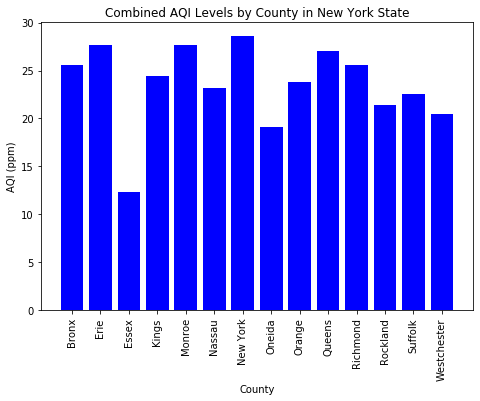

In [14]:
# aqi_chart = NYcountyaqi.plot(kind='bar')
# aqi_chart.set_xlabel("County")
# aqi_chart.set_ylabel("AQI (ppm)")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
county = NYcountyaqi["county"]
aqi = NYcountyaqi["aqi"]
ax.bar(county,aqi, color="blue")
plt.xticks(rotation=90)
plt.title("Combined AQI Levels by County in New York State")
plt.xlabel("County")
plt.ylabel('AQI (ppm)')
plt.show()

# plt.show()
# plt.tight_layout()

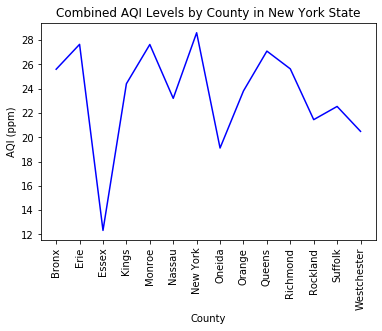

In [15]:
County = NYcountyaqi["county"]
AQI = NYcountyaqi["aqi"]
plt.title("Combined AQI Levels by County in New York State")
plt.xlabel("County")
plt.ylabel('AQI (ppm)')
plt.xticks(rotation=90)
aqibydate, = plt.plot(County, AQI, color="blue", label="Combined AQI Levels in New York State")
plt.show()

In [21]:
mergedny_df.head()

,state_code_x,county_code_x,site_number_x,parameter_code_x,poc_x,latitude_x,longitude_x,datum_x,parameter_x,sample_duration_x,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
1,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
2,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
5,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
6,36,063,1006,44201,1.0,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
newmerge = mergedny_df.drop(["method", "state_code_x", "county_code_x", "site_number_x", "poc_x", "latitude_x", "longitude_x", "datum_x", "parameter_x"], axis=1)
twomerge = newmerge.drop(["parameter_code_x", "pollutant_standard_x", "event_type_x", "validity_indicator_x", "arithmetic_mean_x", "method_code", "local_site_name", "site_address", "cbsa_code"], axis=1)
twomerge.head()

,sample_duration_x,date_local_x,units_of_measure_x,observation_count_x,observation_percent_x,first_max_value_x,first_max_hour_x,aqi_x,method_code_x,method_x,...,validity_indicator,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city,cbsa,date_of_last_change
1,8-HR RUN AVG BEGIN HOUR,2019-01-01,Parts per million,24.0,100.0,0.030,19.0,28.0,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,...,Y,9.1,9.1,23.0,38.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
2,8-HR RUN AVG BEGIN HOUR,2019-01-01,Parts per million,24.0,100.0,0.030,19.0,28.0,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8-HR RUN AVG BEGIN HOUR,2019-01-01,Parts per million,17.0,100.0,0.030,19.0,28.0,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,...,Y,9.5,9.5,23.0,40.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
5,8-HR RUN AVG BEGIN HOUR,2019-01-02,Parts per million,24.0,100.0,0.029,0.0,27.0,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,...,Y,9.3,9.3,23.0,39.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
6,8-HR RUN AVG BEGIN HOUR,2019-01-02,Parts per million,24.0,100.0,0.029,0.0,27.0,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NYbydate_df = pd.DataFrame(mergedny_df.groupby(["date_local", "county"]).mean().unstack())
NYbydate_df

In [ ]:
NYbydate_df.index
#convert index to datetime
NYbydate_df.index = pd.to_datetime(NYbydate_df.index)
#average data by months
monthly_averages = NYbydate_df.resample('M').mean()
monthly_averages

In [ ]:
monthly_averages.index

In [ ]:
aqi_chart = monthly_averages.plot(kind='bar')
aqi_chart.set_xlabel("date_local")
aqi_chart.set_ylabel("aqi")

plt.show()
plt.tight_layout()